## 총 이용객이 많은 역과 적은 역의 유임승차자 비율은 어떻게 다를까?

In [53]:
import pandas as pd

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [83]:
df_trans_seoul=pd.read_csv('./seoul_stations.csv')

df_trans_seoul.drop(columns=['주소', '위도', '경도'], inplace=True)

In [84]:
# 환승가능여부 컬럼 추가
df_trans_seoul['환승가능여부'] = ''
stations = df_trans_seoul['지하철역'].unique()

for i in stations:
    index = df_trans_seoul[df_trans_seoul['지하철역'] == i].index
    if len(df_trans_seoul[df_trans_seoul['지하철역'] == i]) > 1:
        for j in index:
            df_trans_seoul.iloc[j,-1] = 'Y'
    else:
        df_trans_seoul.iloc[index[0],-1] = 'N'

In [77]:
# 이용객이 적은 역에 대한 분석용 데이터
df_trans_lower = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False).sum()
df_trans_lower['환승호선'] = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False)[['호선명']].sum().values
df_trans_lower.head(3)

# 총 이용객에 대한 오름차순 정렬
df_trans_lower.sort_values('총 이용객', inplace=True)

df_trans_lower.reset_index(inplace=True)
df_trans_lower.head(3)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10464\1616707372.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trans_lower = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False).sum()


,지하철역,환승가능여부,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,00시-01시 승차인원,00시-01시 하차인원,1시이후 승차,1시이후 하차,총 이용객,유임승차인원,무임승차인원,유임하차인원,무임하차인원,환승호선
0,둔촌오륜,N,0.513514,0.054054,171.324324,154.297297,728.837838,1493.567568,2762.459459,3117.567568,...,17.891892,109.081081,0.459459,5.243243,51995.621622,22110.729730,5096.297297,19689.945946,5098.648649,9호선
1,신내,Y,13.383333,0.233333,493.916667,370.000000,1385.746667,1692.633333,3314.380000,3298.133333,...,4.280000,132.333333,0.033333,0.050000,60627.416667,20713.593333,9150.273333,21884.566667,8878.983333,6호선경춘선
2,도림천,N,2.483333,0.066667,357.533333,337.316667,1105.483333,844.483333,2931.333333,4494.350000,...,24.500000,252.516667,0.650000,5.866667,69743.083333,27226.300000,6403.083333,29167.050000,6946.650000,2호선


In [78]:
df_trans_fares = pd.concat([df_trans_lower['지하철역'], df_trans_lower[df_trans_lower.columns[-5:-1]]], axis=1)

df_trans_fares['유임이용객'] = df_trans_fares['유임승차인원'] + df_trans_fares['유임하차인원']
df_trans_fares['무임이용객'] = df_trans_fares['무임승차인원'] + df_trans_fares['무임하차인원']
df_trans_fares['총 이용객'] = df_trans_fares['유임이용객'] + df_trans_fares['무임이용객']

df_trans_fares.drop(columns=df_trans_fares.columns[1:5], inplace=True)

In [79]:
df_trans_fares['유임이용객 비율']=round(df_trans_fares['유임이용객']/df_trans_fares['총 이용객'],3)
df_trans_fares['무임이용객 비율']=round(df_trans_fares['무임이용객']/df_trans_fares['총 이용객'],3)

In [80]:
df_trans_fares

,지하철역,유임이용객,무임이용객,총 이용객,유임이용객 비율,무임이용객 비율
0,둔촌오륜,4.180068e+04,10194.945946,5.199562e+04,0.804,0.196
1,신내,4.259816e+04,18029.256667,6.062742e+04,0.703,0.297
2,도림천,5.639335e+04,13349.733333,6.974308e+04,0.809,0.191
3,신답,7.060990e+04,19692.600000,9.030250e+04,0.782,0.218
4,남태령,7.452645e+04,15989.983333,9.051643e+04,0.823,0.177
...,...,...,...,...,...,...
292,사당,3.371591e+06,523158.733333,3.894750e+06,0.866,0.134
293,홍대입구,4.593204e+06,236654.604054,4.829859e+06,0.951,0.049
294,고속터미널,4.454935e+06,568487.550000,5.023422e+06,0.887,0.113
295,강남,5.059536e+06,304524.550000,5.364060e+06,0.943,0.057


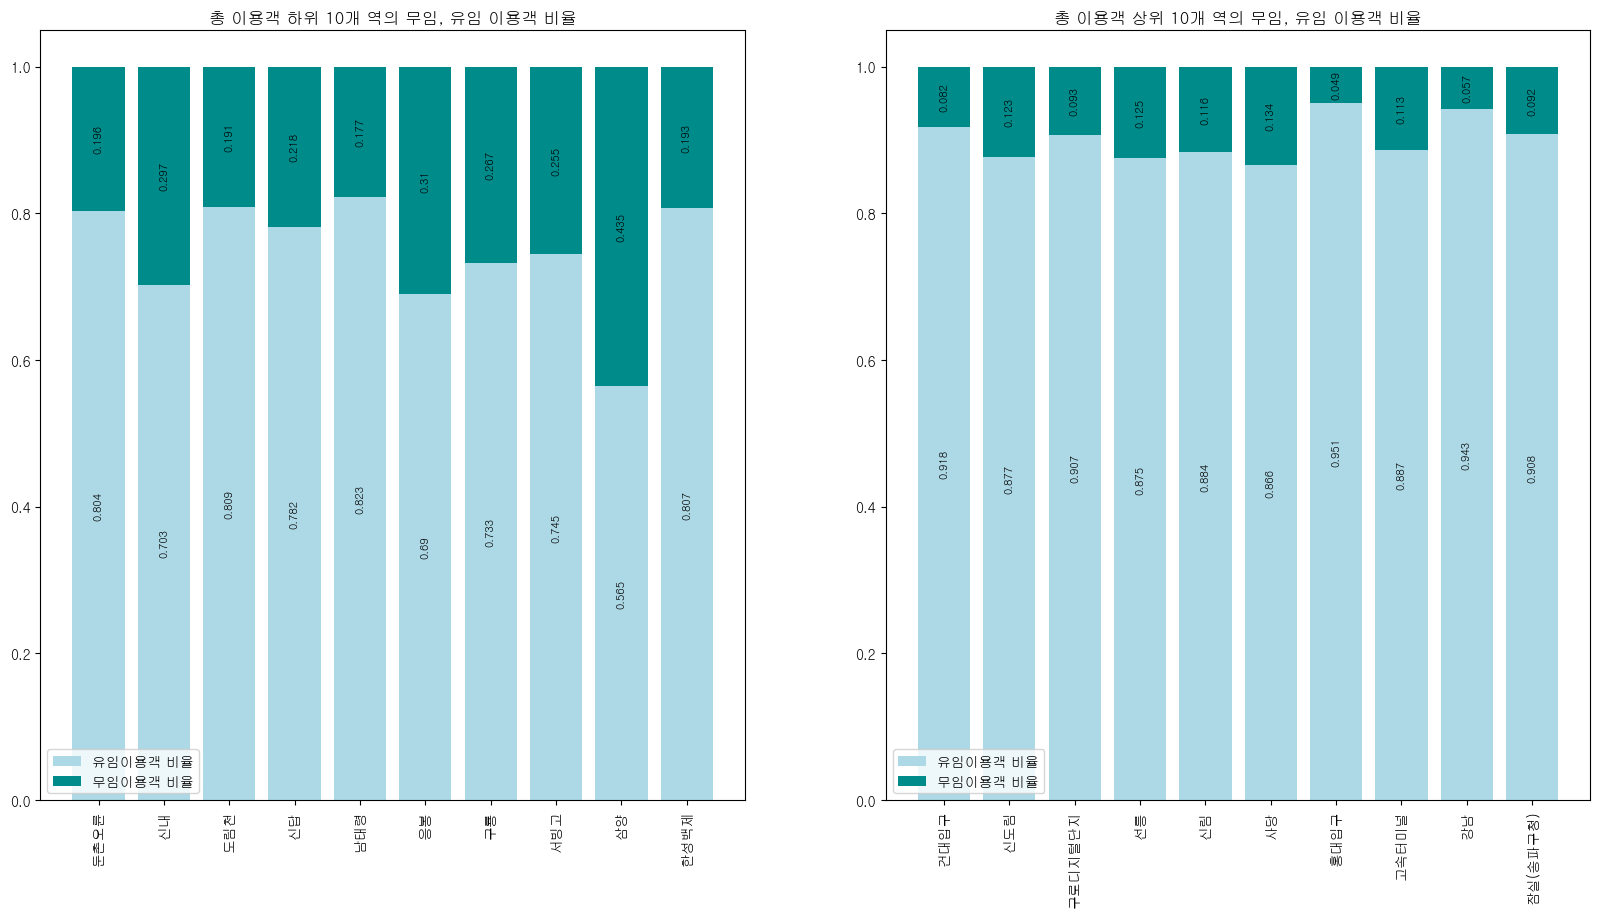

In [81]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
bar1=ax1.bar(df_trans_fares.head(10)['지하철역'],df_trans_fares.head(10)['유임이용객 비율'], color='lightblue')
bar2=ax1.bar(df_trans_fares.head(10)['지하철역'],df_trans_fares.head(10)['무임이용객 비율'],bottom=df_trans_fares.head(10)['유임이용객 비율'], color='darkcyan')
plt.title("총 이용객 하위 10개 역의 무임, 유임 이용객 비율")
plt.xticks(df_trans_fares.head(10)['지하철역'], rotation=90)
plt.bar_label(bar1,size=8,label_type='center', rotation=90)
plt.bar_label(bar2,size=8,label_type='center', rotation=90)
plt.legend(handles=(bar1,bar2), labels=('유임이용객 비율','무임이용객 비율'), loc='lower left')

ax2 = fig.add_subplot(1,2,2)
bar1=ax2.bar(df_trans_fares.tail(10)['지하철역'],df_trans_fares.tail(10)['유임이용객 비율'], color='lightblue')
bar2=ax2.bar(df_trans_fares.tail(10)['지하철역'],df_trans_fares.tail(10)['무임이용객 비율'],bottom=df_trans_fares.tail(10)['유임이용객 비율'], color='darkcyan')
plt.title("총 이용객 상위 10개 역의 무임, 유임 이용객 비율")
plt.xticks(df_trans_fares.tail(10)['지하철역'], rotation=90)
plt.bar_label(bar1,size=8,label_type='center', rotation=90)
plt.bar_label(bar2,size=8,label_type='center', rotation=90)
plt.legend(handles=(bar1,bar2), labels=('유임이용객 비율','무임이용객 비율'), loc='lower left')

plt.show()

## 환승역이면 젊은 층이 많이 살까?(유임 이용객이 많을까?)

In [89]:
df_trans_lower = df_trans_seoul.groupby(['환승가능여부'], group_keys=False).mean()
df_trans_lower=df_trans_lower.reset_index()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10464\2704231487.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trans_lower = df_trans_seoul.groupby(['환승가능여부'], group_keys=False).mean()


In [90]:
df_trans_fares = pd.concat([df_trans_lower['환승가능여부'], df_trans_lower[df_trans_lower.columns[-5:]]], axis=1)

df_trans_fares['유임이용객'] = df_trans_fares['유임승차인원'] + df_trans_fares['유임하차인원']
df_trans_fares['무임이용객'] = df_trans_fares['무임승차인원'] + df_trans_fares['무임하차인원']
df_trans_fares['총 이용객'] = df_trans_fares['유임이용객'] + df_trans_fares['무임이용객']
df_trans_fares['유임이용객 비율']=round(df_trans_fares['유임이용객']/df_trans_fares['총 이용객'],3)
df_trans_fares['무임이용객 비율']=round(df_trans_fares['무임이용객']/df_trans_fares['총 이용객'],3)

In [92]:
df_trans_fares

,환승가능여부,총 이용객,유임승차인원,무임승차인원,유임하차인원,무임하차인원,유임이용객,무임이용객,유임이용객 비율,무임이용객 비율
0,N,804058.307652,338762.693961,64463.534813,336883.334001,63948.744876,675646.027962,128412.279689,0.840,0.160
1,Y,805847.294669,340633.459241,59397.065643,347336.116030,58480.653754,687969.575272,117877.719397,0.854,0.146


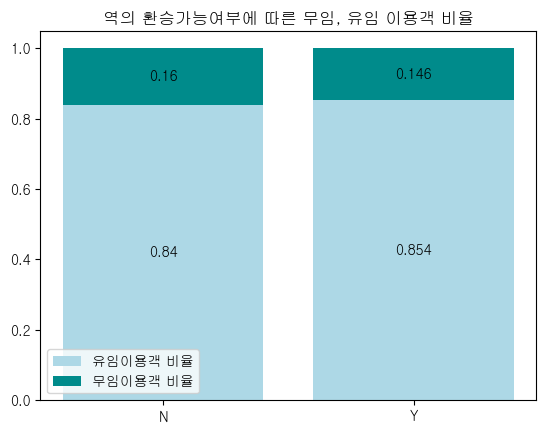

In [98]:
bar1=plt.bar(df_trans_fares['환승가능여부'],df_trans_fares['유임이용객 비율'], color='lightblue')
bar2=plt.bar(df_trans_fares['환승가능여부'],df_trans_fares['무임이용객 비율'],bottom=df_trans_fares['유임이용객 비율'], color='darkcyan')
plt.title("역의 환승가능여부에 따른 무임, 유임 이용객 비율")
plt.xticks(df_trans_fares['환승가능여부'])
plt.bar_label(bar1,size=10,label_type='center')
plt.bar_label(bar2,size=10,label_type='center')
plt.legend(handles=(bar1,bar2), labels=('유임이용객 비율','무임이용객 비율'), loc='lower left')